In [4]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [5]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 1

def normalize(img):
    img = tf.cast(img, tf.float32)
    img = (img / 127.5) - 1
    return img

def read_file(filename):
    # read the filename
    x = tf.io.read_file(filename)
    # Convert into color image
    x = tf.image.decode_jpeg(x, channels=3)
    x = normalize(x)
    # return image with specific image width and height
    return tf.image.resize(x, [IMG_WIDTH//2, IMG_HEIGHT//2])

# Code credit: https://www.tensorflow.org/tutorials/generative/cyclegan
# Generate image from particular model when feeding test_input as input
def generate_images(model, test_input):
    prediction = model(test_input)
    
    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i]*0.5+0.5)
        plt.axis('off')
    plt.show()

def predictImage(data_dir, BUFFER_SIZE, F):
    print('*'*50)
    data_dir = pathlib.Path(data_dir)
    print(data_dir)
    list_1 = tf.data.Dataset.list_files(str(data_dir)+'/*')
    print(list_1)
    for i in list_1.take(5):
        print(i.numpy())
    test = list_1.map(read_file, num_parallel_calls=-1)
    test = test.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    for inp in test.take(5):
        generate_images(F,inp)

**************************************************
datasets\cezanne2photo\testB
<ShuffleDataset shapes: (), types: tf.string>
b'datasets\\cezanne2photo\\testB\\2014-12-18 03_04_56.jpg'
b'datasets\\cezanne2photo\\testB\\2014-10-14 19_47_48.jpg'
b'datasets\\cezanne2photo\\testB\\2014-08-01 22_38_22.jpg'
b'datasets\\cezanne2photo\\testB\\2014-12-24 05_41_33.jpg'
b'datasets\\cezanne2photo\\testB\\2014-12-08 10_31_27.jpg'


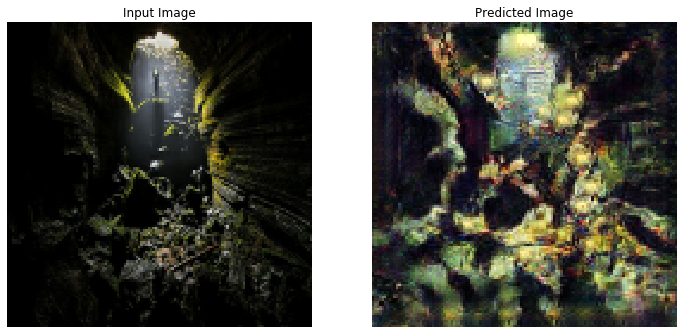

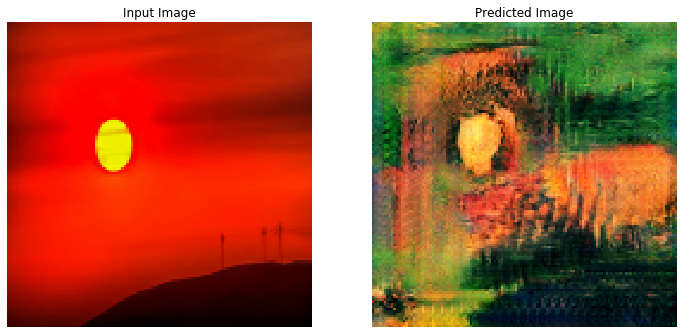

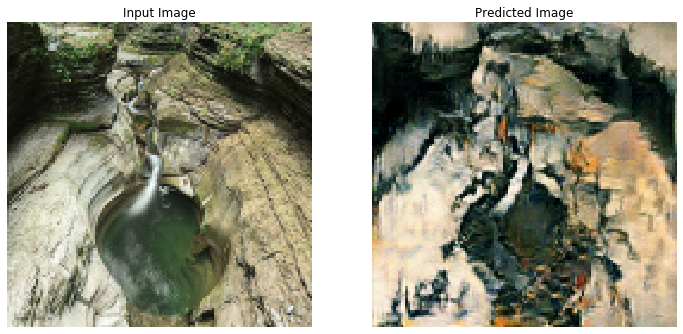

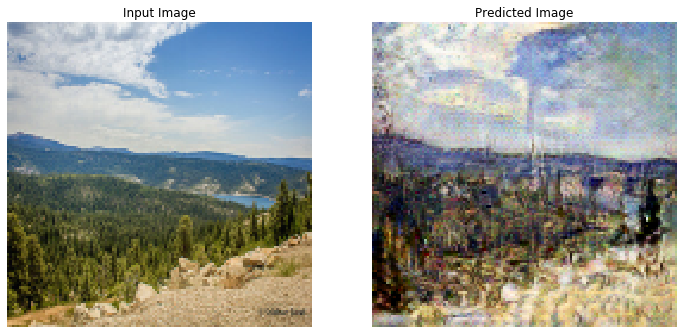

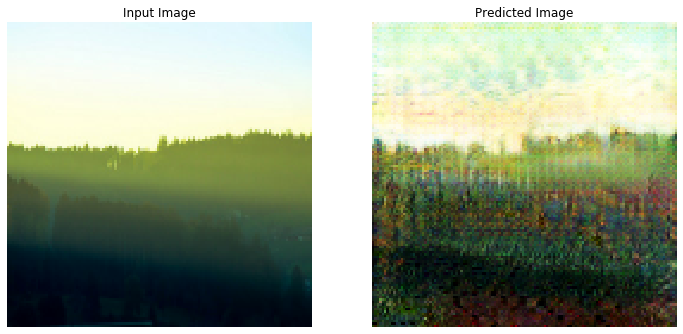

In [6]:
# Load saveModel
F = tf.keras.models.load_model('F_Model')
# Just enter the directory which contain photo images with image size 256x256.
predictImage('./datasets/cezanne2photo/testB/',100,F)

<table>
    <th colspan='2' style='text-align:center;'>Train per steps</th>
    <tr>
        <td style='text-align:center;'><b>Dx Loss</b></td>
        <td style='text-align:center;'><b>Dy Loss</b></td>
    </tr>
    <tr>
        <td><img src='./train_per_step/Dx_loss.png'></td>
        <td><img src='./train_per_step/Dy_loss.png'></td>
    </tr>
    <tr>
        <td style='text-align:center;'><b>F Loss</b></td>
        <td style='text-align:center;'><b>G Loss</b></td>
    </tr>
    <tr>
        <td><img src='./train_per_step/F_loss.png'></td>
        <td><img src='./train_per_step/G_loss.png'></td>
    </tr>

<table>
    <th colspan='2' style='text-align:center;'>Train per epoch</th>
    <tr>
        <td style='text-align:center;'><b>Dx Loss</b></td>
        <td style='text-align:center;'><b>Dy Loss</b></td>
    </tr>
    <tr>
        <td><img src='./train_per_epoch/Dx_loss.png'></td>
        <td><img src='./train_per_epoch/Dy_loss.png'></td>
    </tr>
    <tr>
        <td style='text-align:center;'><b>F Loss</b></td>
        <td style='text-align:center;'><b>G Loss</b></td>
    </tr>
    <tr>
        <td><img src='./train_per_epoch/F_loss.png'></td>
        <td><img src='./train_per_epoch/G_loss.png'></td>
    </tr>